## Visualization for evaluation task

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Visualization comparing 3 schema with base model

We performed with base model since it requires no training --> cheap

In [11]:
base_model_all_schema = {
    "Macro F1 score weight distribution for DeepSeek R1 8B": ["Equal weight", "Heavier weight on stability", "Heavier weight on cell structure", "Heavier weight on numeric data", "Normalized PCE difference prediction", "Stability Prediction"],
    "Original Schema (fully nested)": [0.482368, 0.436066, 0.493181, 0.493456, 0.640238, 0.416891],
    "2nd Schema (semi nested)": [0.614833, 0.598228, 0.601051, 0.640757, 0.720972, 0.589342],
    "3rd Schema (flat)": [0.528366, 0.523243, 0.542547, 0.518826, 0.558432, 0.587848],
}

In [12]:
base_model_df = pd.DataFrame(base_model_all_schema)
base_model_df

,Macro F1 score weight distribution for DeepSeek R1 8B,Original Schema (fully nested),2nd Schema (semi nested),3rd Schema (flat)
0,Equal weight,0.482368,0.614833,0.528366
1,Heavier weight on stability,0.436066,0.598228,0.523243
2,Heavier weight on cell structure,0.493181,0.601051,0.542547
3,Heavier weight on numeric data,0.493456,0.640757,0.518826
4,Normalized PCE difference prediction,0.640238,0.720972,0.558432
5,Stability Prediction,0.416891,0.589342,0.587848


In [13]:
base_model_df.shape

(6, 4)

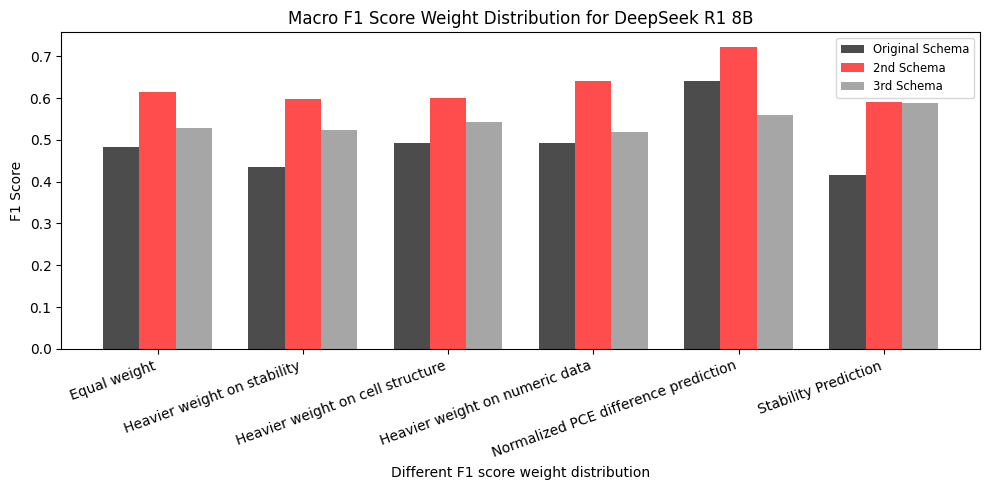

In [21]:
# Data extracted from the table
categories = base_model_df["Macro F1 score weight distribution for DeepSeek R1 8B"]
original_schema = base_model_df["Original Schema (fully nested)"]
schema_2 = base_model_df["2nd Schema (semi nested)"]
schema_3 = base_model_df["3rd Schema (flat)"]

x = np.arange(base_model_df.shape[0])  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
bars1 = ax.bar(x - width, original_schema, width, label='Original Schema', color='black', alpha=0.7)
bars2 = ax.bar(x, schema_2, width, label='2nd Schema', color='red', alpha=0.7)  # Highlighted in red
bars3 = ax.bar(x + width, schema_3, width, label='3rd Schema', color='gray', alpha=0.7)

# Labels and titles
ax.set_xlabel("Different F1 score weight distribution")
ax.set_ylabel("F1 Score")
ax.set_title("Macro F1 Score Weight Distribution for DeepSeek R1 8B")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=20, ha="right")
ax.legend(loc='upper right', fontsize="small")


# Display the chart
plt.tight_layout()
plt.show()


This concldes that it is worthy to investigate model performacne for Original Schema (since we have the code) vs Schema 2

## Visualization comparing Schema 1 vs 2

In [23]:
schema_2 = {
    "Macro F1 score weight distribution": ["Macro F1 score of equal weight", "Heavier weight on stability", "Heavier weight on cell structure", "Heavier weight on numeric data", "Normalized PCE difference prediction", "Stability Prediction"],
    "DeepSeek R1 8B": [0.614833, 0.598228, 0.601051, 0.640757, 0.720972, 0.589342],
    "DeepSeek R1 8B Finetuned": [0.572116, 0.576520, 0.539384, 0.640757, 0.620363, 0.570073],
    "Llama-3.2 3B Instruct": [0.405046, 0.421782, 0.347594, 0.440929, 0.481657, 0.416503],
}

schema_1 = {
    "Macro F1 score weight distribution": ["Macro F1 score of equal weight", "Heavier weight on stability", "Heavier weight on cell structure", "Heavier weight on numeric data", "Prediction 1", "Normalized PCE difference prediction", "Stability Prediction"],
    "DeepSeek R1 8B": [0.482368, 0.436066, 0.493181, 0.493456,0.657539 , 0.640238, 0.416891],
    "DeepSeek R1 4B Finetuned": [0.534286, 0.484614, 0.543904, 0.548533, 0.671424, 0.699868, 0.448522],
    "DeepSeek R1 8B Finetuned": [0.595668, 0.570296, 0.597418, 0.598561, 0.655673, 0.679721, 0.545081],
    "Llama-3.2 3B Instruct": [0.588818, 0.555704, 0.596438, 0.587925, 0.651199, 0.682697, 0.518120],
}
schema_1df = pd.DataFrame(schema_1)
schema_1df = schema_1df.drop(4)
schema_1df = schema_1df[["Macro F1 score weight distribution","DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]]
schema_1df.columns = ["Macro F1 score weight distribution","DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]
schema_1df

,Macro F1 score weight distribution,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
0,Macro F1 score of equal weight,0.482368,0.595668,0.588818
1,Heavier weight on stability,0.436066,0.570296,0.555704
2,Heavier weight on cell structure,0.493181,0.597418,0.596438
3,Heavier weight on numeric data,0.493456,0.598561,0.587925
5,Normalized PCE difference prediction,0.640238,0.679721,0.682697
6,Stability Prediction,0.416891,0.545081,0.518120


In [24]:
schema_2df = pd.DataFrame(schema_2)
schema_2df.columns = ["Macro F1 score weight distribution","DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]
schema_2df

,Macro F1 score weight distribution,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
0,Macro F1 score of equal weight,0.614833,0.572116,0.405046
1,Heavier weight on stability,0.598228,0.576520,0.421782
2,Heavier weight on cell structure,0.601051,0.539384,0.347594
3,Heavier weight on numeric data,0.640757,0.640757,0.440929
4,Normalized PCE difference prediction,0.720972,0.620363,0.481657
5,Stability Prediction,0.589342,0.570073,0.416503


## First analyze the equal weight extraction result

In [26]:
schema_1_equal_weight = schema_1df.iloc[[0]][["DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]]
schema_1_equal_weight

,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
0,0.482368,0.595668,0.588818


In [27]:
schema_2_equal_weight = schema_2df.iloc[[0]][["DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]]
schema_2_equal_weight

,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
0,0.614833,0.572116,0.405046


In [28]:
data = {
    "Model": schema_2_equal_weight.columns,
    "Schema 1": schema_1_equal_weight.iloc[0],
    "Schema 2": schema_2_equal_weight.iloc[0]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

df_comparison

,Model,Schema 1,Schema 2
DeepSeek R1 8B,DeepSeek R1 8B,0.482368,0.614833
DeepSeek R1 8B Finetuned,DeepSeek R1 8B Finetuned,0.595668,0.572116
Llama-3.2 3B Instruct,Llama-3.2 3B Instruct,0.588818,0.405046


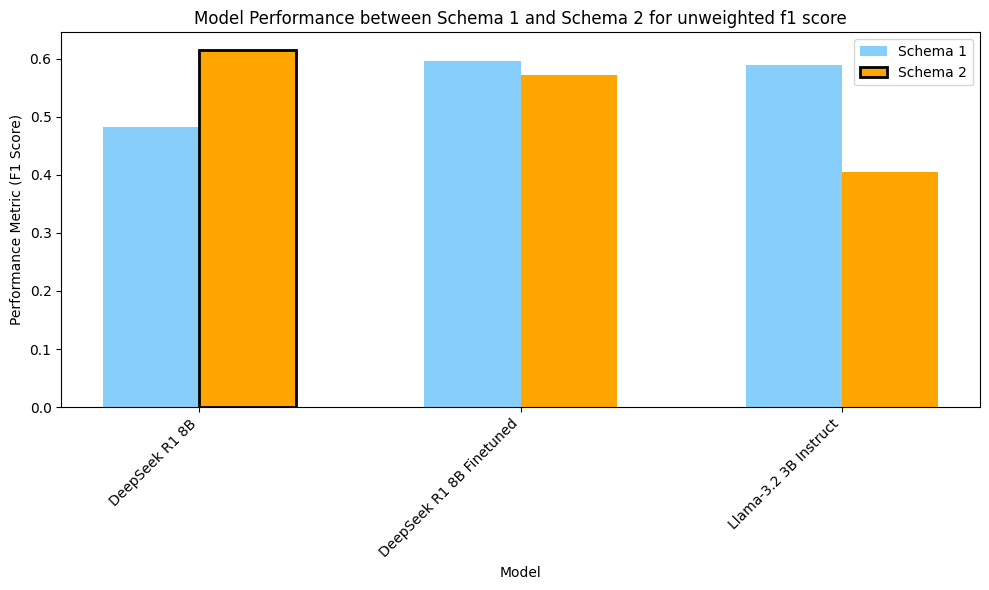

In [29]:
# Data for the models (F1 scores)
models = df_comparison['Model']
schema_1_scores = df_comparison['Schema 1']
schema_2_scores = df_comparison['Schema 2']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.3
x = np.arange(len(models))


# Lighten the colors for schema 1 and schema 2, keeping the highlighted orange bar darker
ax.bar(x - width/2, schema_1_scores, width, label='Schema 1', color='lightskyblue')
bars_schema_2 = ax.bar(x + width/2, schema_2_scores, width, label='Schema 2', color='orange')

# Highlight the first bar of Schema 2 (orange) with darker color
bars_schema_2[0].set_edgecolor('black')  # Highlight the leftmost bar with a black edge
bars_schema_2[0].set_linewidth(2)

# Rotate x-axis labels for better readability
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric (F1 Score)')
ax.set_title('Model Performance between Schema 1 and Schema 2 for unweighted f1 score')

# Add legend
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()

## Then, analyze the extraction performance on 1 prediction task

In [31]:
schema_1_prediction1 = schema_1df.iloc[[4]][["DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]]
schema_1_prediction1

,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
5,0.640238,0.679721,0.682697


In [32]:
schema_2_prediction1 = schema_2df.iloc[[4]][["DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]]
schema_2_prediction1

,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
4,0.720972,0.620363,0.481657


In [33]:
data = {
    "Model": schema_1_prediction1.columns,
    "Schema 1": schema_1_prediction1.iloc[0],
    "Schema 2": schema_2_prediction1.iloc[0]
}

# Create a DataFrame
df_comparison_2 = pd.DataFrame(data)

df_comparison_2

,Model,Schema 1,Schema 2
DeepSeek R1 8B,DeepSeek R1 8B,0.640238,0.720972
DeepSeek R1 8B Finetuned,DeepSeek R1 8B Finetuned,0.679721,0.620363
Llama-3.2 3B Instruct,Llama-3.2 3B Instruct,0.682697,0.481657


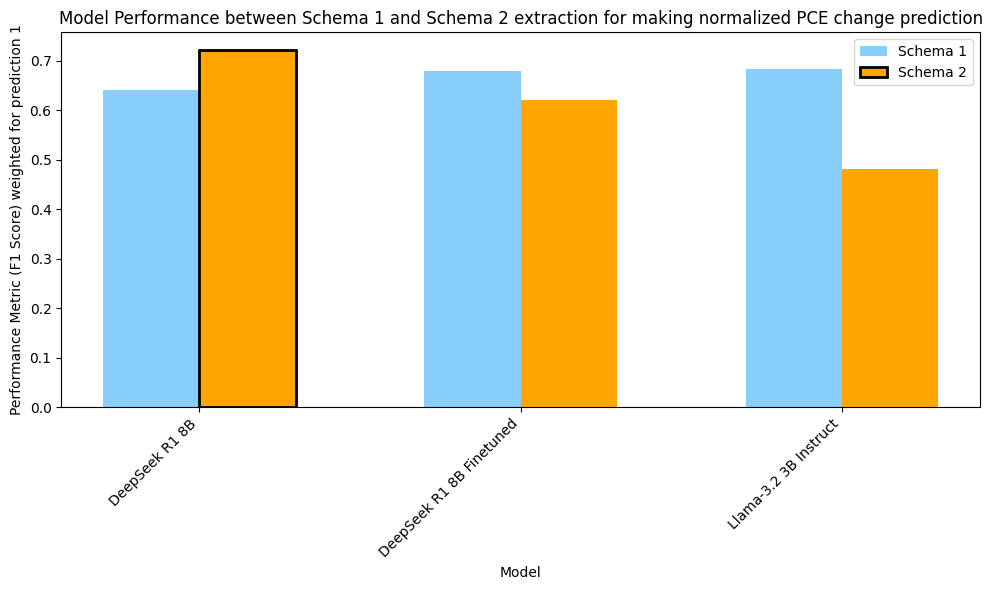

In [34]:
# Data for the models (F1 scores)
models = df_comparison_2['Model']
schema_1_scores = df_comparison_2['Schema 1']
schema_2_scores = df_comparison_2['Schema 2']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.3
x = np.arange(len(models))


# Lighten the colors for schema 1 and schema 2, keeping the highlighted orange bar darker
ax.bar(x - width/2, schema_1_scores, width, label='Schema 1', color='lightskyblue')
bars_schema_2 = ax.bar(x + width/2, schema_2_scores, width, label='Schema 2', color='orange')

# Highlight the first bar of Schema 2 (orange) with darker color
bars_schema_2[0].set_edgecolor('black')  # Highlight the leftmost bar with a black edge
bars_schema_2[0].set_linewidth(2)

# Rotate x-axis labels for better readability
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric (F1 Score) weighted for prediction 1')
ax.set_title('Model Performance between Schema 1 and Schema 2 extraction for making normalized PCE change prediction')

# Add legend
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()

## Then, analyze the extraction performacne on 2 prediction task

In [35]:
schema_1_prediction2 = schema_1df.iloc[[5]][["DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]]
schema_1_prediction2

,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
6,0.416891,0.545081,0.51812


In [36]:
schema_2_prediction2 = schema_2df.iloc[[5]][["DeepSeek R1 8B", "DeepSeek R1 8B Finetuned", "Llama-3.2 3B Instruct"]]
schema_2_prediction2

,DeepSeek R1 8B,DeepSeek R1 8B Finetuned,Llama-3.2 3B Instruct
5,0.589342,0.570073,0.416503


In [37]:
data = {
    "Model": schema_2_prediction2.columns,
    "Schema 1": schema_1_prediction2.iloc[0],
    "Schema 2": schema_2_prediction2.iloc[0]
}

# Create a DataFrame
df_comparison_3 = pd.DataFrame(data)

df_comparison_3

,Model,Schema 1,Schema 2
DeepSeek R1 8B,DeepSeek R1 8B,0.416891,0.589342
DeepSeek R1 8B Finetuned,DeepSeek R1 8B Finetuned,0.545081,0.570073
Llama-3.2 3B Instruct,Llama-3.2 3B Instruct,0.518120,0.416503


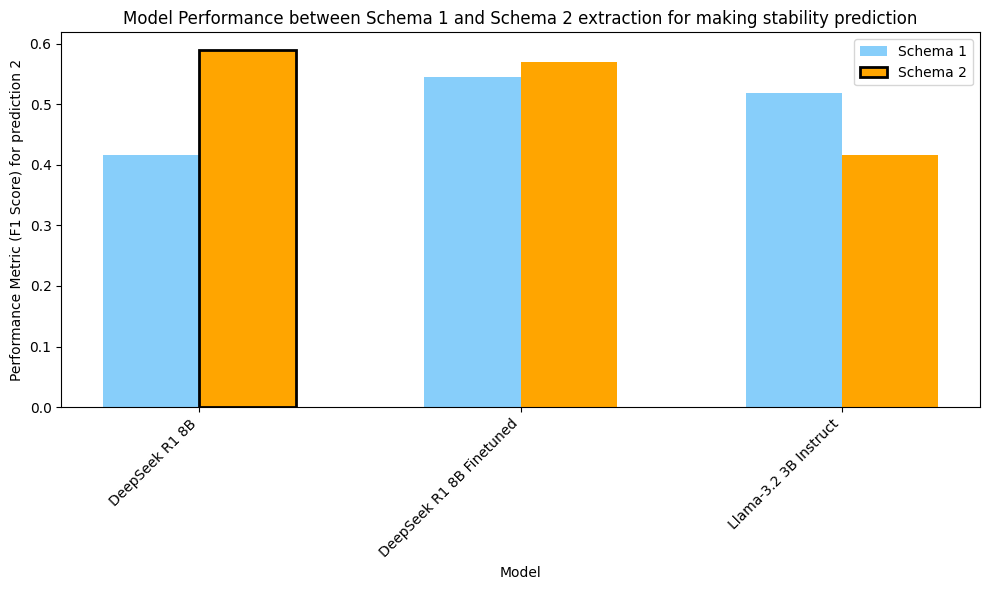

In [38]:
# Data for the models (F1 scores)
models = df_comparison_3['Model']
schema_1_scores = df_comparison_3['Schema 1']
schema_2_scores = df_comparison_3['Schema 2']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.3
x = np.arange(len(models))


# Lighten the colors for schema 1 and schema 2, keeping the highlighted orange bar darker
ax.bar(x - width/2, schema_1_scores, width, label='Schema 1', color='lightskyblue')
bars_schema_2 = ax.bar(x + width/2, schema_2_scores, width, label='Schema 2', color='orange')

# Highlight the first bar of Schema 2 (orange) with darker color
bars_schema_2[0].set_edgecolor('black')  # Highlight the leftmost bar with a black edge
bars_schema_2[0].set_linewidth(2)

# Rotate x-axis labels for better readability
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric (F1 Score) for prediction 2')
ax.set_title('Model Performance between Schema 1 and Schema 2 extraction for making stability prediction')

# Add legend
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()

#### Making these bar graph stacked for simplicity

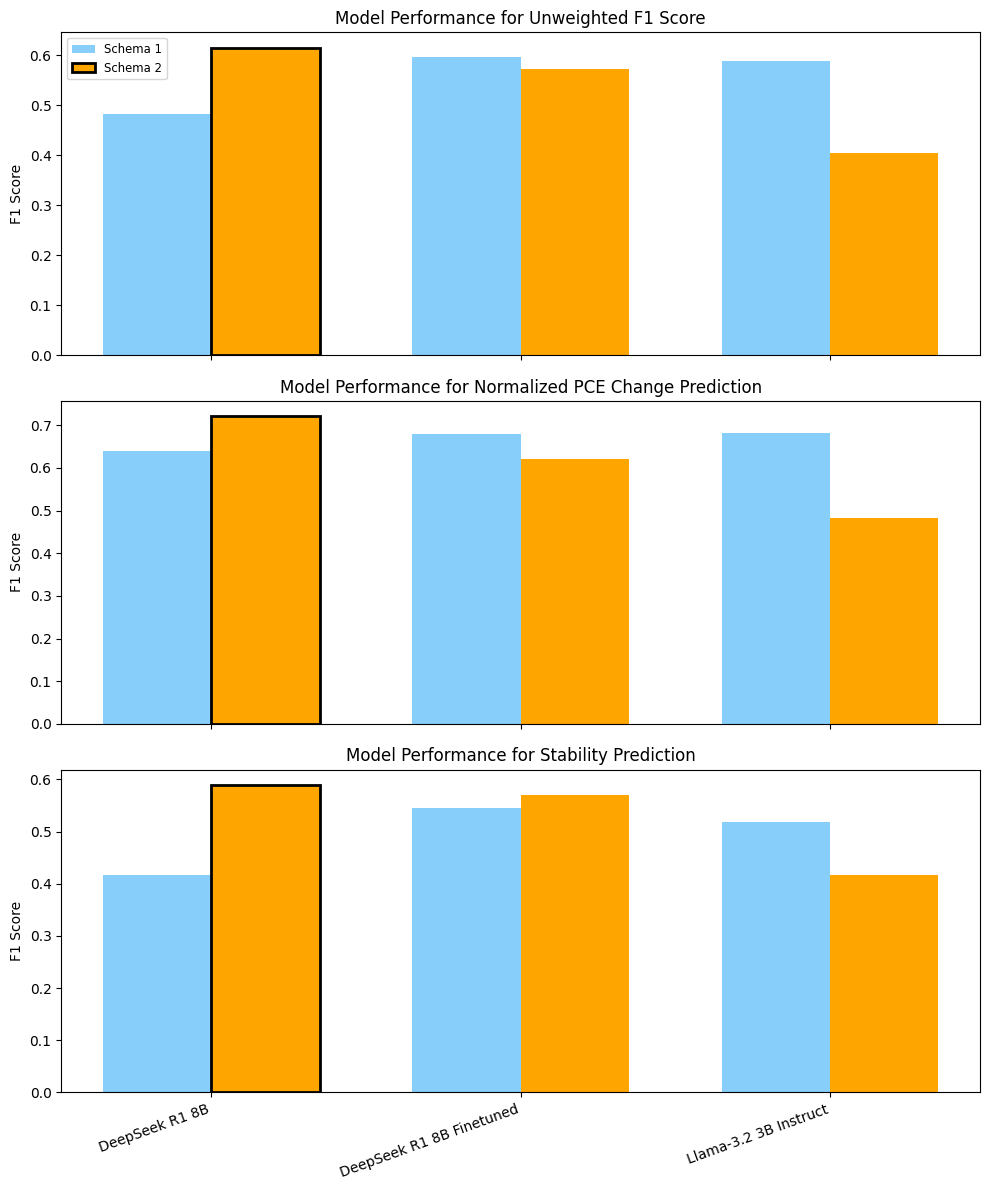

In [50]:
# Define the data extracted from the provided code
models = df_comparison_3['Model']

# F1 scores for Schema 1 and Schema 2 across the three different evaluations
schema_1_scores = [
    df_comparison['Schema 1'],  # Unweighted F1 Score
    df_comparison_2['Schema 1'],  # PCE Prediction
    df_comparison_3['Schema 1'],  # Stability Prediction
]

schema_2_scores = [
    df_comparison['Schema 2'],  # Unweighted F1 Score
    df_comparison_2['Schema 2'],  # PCE Prediction
    df_comparison_3['Schema 2'], # Stability Prediction
]

titles = [
    "Unweighted F1 Score",
    "Normalized PCE Change Prediction",
    "Stability Prediction"
]

# Create a figure with 3 subplots (stacked vertically)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Bar width
width = 0.35
x = np.arange(len(models))

# Plot each metric in a separate subplot
for i, ax in enumerate(axes):
    ax.bar(x - width/2, schema_1_scores[i], width, label="Schema 1", color="lightskyblue")
    bars_schema_2 = ax.bar(x + width/2, schema_2_scores[i], width, label="Schema 2", color="orange")

    # Highlight the first bar of Schema 2
    bars_schema_2[0].set_edgecolor("black")
    bars_schema_2[0].set_linewidth(2)

    ax.set_ylabel("F1 Score")
    ax.set_title(f"Model Performance for {titles[i]}")
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=20, ha="right")

# Add a single legend for all subplots
axes[0].legend(loc="upper left", fontsize="small")

# Adjust layout
plt.tight_layout()
plt.show()


## Now that base deepseek is proven best, we will visualize the progress in its performance through versions of prompt engineerings

In [39]:
# Data based on the extracted text
data = {
    'Base Deepseek 8 bit f1 score weights': [
        'Macro F1 score with equal weight',
        'Heavier weight on stability',
        'Heavier weight on perovskite structure',
        'Heavier weight on numeric data',
        "Normalized PCE difference prediction", 
        "Stability Prediction"
    ],
    'Version 0': [0.381163, 0.366327, 0.351419, 0.421832, 0.525267, 0.361402],
    'Version 1': [0.631299, 0.624677, 0.607459, 0.648654, 0.731932, 0.631420],
    'Version 2': [0.602643, 0.584612, 0.586323, 0.595183, 0.709792, 0.571551],
    'Version 3': [0.579939, 0.548287, 0.577159, 0.595183, 0.712572, 0.540126],
    'Version 4': [0.628984, 0.597959, 0.615093, 0.658832, 0.790518, 0.584060],
    'Version 5': [0.628984, 0.597959, 0.615093, 0.658832, 0.790518, 0.584060]
}

# Create DataFrame
versions_df = pd.DataFrame(data)
versions_df

,Base Deepseek 8 bit f1 score weights,Version 0,Version 1,Version 2,Version 3,Version 4,Version 5
0,Macro F1 score with equal weight,0.381163,0.631299,0.602643,0.579939,0.628984,0.628984
1,Heavier weight on stability,0.366327,0.624677,0.584612,0.548287,0.597959,0.597959
2,Heavier weight on perovskite structure,0.351419,0.607459,0.586323,0.577159,0.615093,0.615093
3,Heavier weight on numeric data,0.421832,0.648654,0.595183,0.595183,0.658832,0.658832
4,Normalized PCE difference prediction,0.525267,0.731932,0.709792,0.712572,0.790518,0.790518
5,Stability Prediction,0.361402,0.631420,0.571551,0.540126,0.584060,0.584060


### Create a line chart that show the progress of F1 score changing

In [40]:
line_chart_data = versions_df.iloc[[0, 4, 5]]
line_chart_data

,Base Deepseek 8 bit f1 score weights,Version 0,Version 1,Version 2,Version 3,Version 4,Version 5
0,Macro F1 score with equal weight,0.381163,0.631299,0.602643,0.579939,0.628984,0.628984
4,Normalized PCE difference prediction,0.525267,0.731932,0.709792,0.712572,0.790518,0.790518
5,Stability Prediction,0.361402,0.631420,0.571551,0.540126,0.584060,0.584060


In [46]:
line_chart_number = line_chart_data[["Version 0","Version 1",	"Version 2",	"Version 3",	"Version 4",	"Version 5"]]

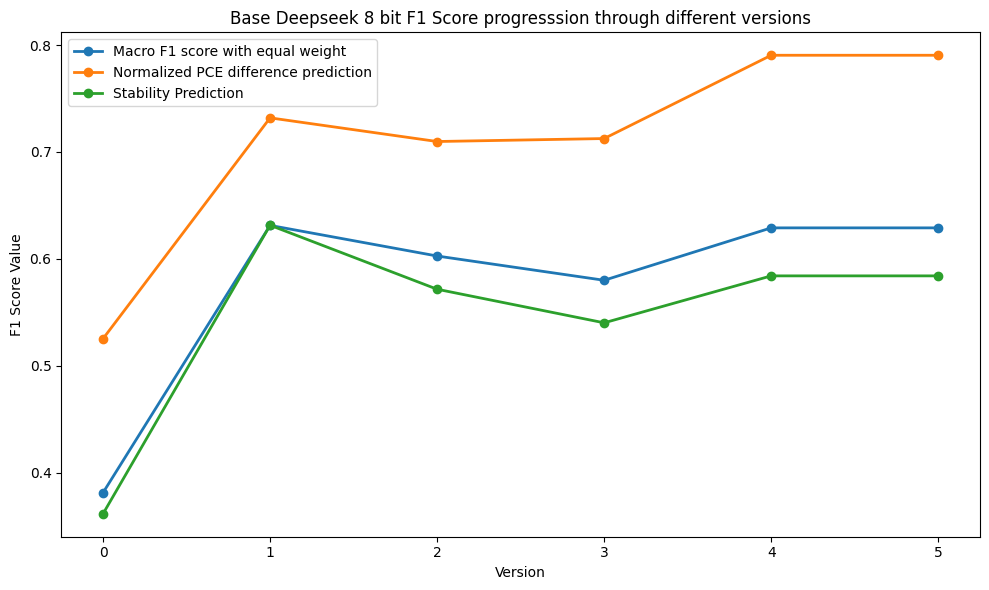

In [47]:
# Extract rows and columns for plotting
labels = [row for row in line_chart_data["Base Deepseek 8 bit f1 score weights"]]
values = [line_chart_number.iloc[i] for i in range(line_chart_number.shape[0])]
# print(values)

# X-axis (version)
versions = [0, 1, 2, 3, 4, 5]

# Plotting the overlapping line chart with unique colors for each row
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each row with a different color
for idx, (label, value) in enumerate(zip(labels, values)):
    ax.plot(versions, value, label=label, marker='o', linestyle='-', linewidth=2)

# Customize the chart
plt.title("Base Deepseek 8 bit F1 Score progresssion through different versions")
plt.xlabel("Version")
plt.ylabel("F1 Score Value")
plt.xticks(versions)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()